In [4]:
import pandas as pd
import matplotlib.pyplot as plt


data_path = '../data/' #if os.path.exists('../data/') #else 'https://raw.githubusercontent.com/TheAwesomeGe/DECD/main/data/'

cvd_df = pd.read_csv(data_path + 'CVD_cleaned.csv')

cvd_df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


Logo numa primeira análise dos dados reparamos que existem outliers, nomeadamente na linha 308851, onde é suposto ter valores de Yes ou No mas tem , "Yes, but female told only during pregnancy". 

In [5]:
cvd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [5]:
cvd_df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

Verificamos que não existem valores em falta

In [6]:
cvd_df.corr(numeric_only=True)

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
Height_(cm),1.000000,0.472186,-0.027408,0.128835,-0.045911,-0.030148,0.108795
Weight_(kg),0.472186,1.000000,0.859699,-0.032373,-0.090612,-0.075904,0.096351
BMI,-0.027408,0.859699,1.000000,-0.108684,-0.076611,-0.070640,0.048366
Alcohol_Consumption,0.128835,-0.032373,-0.108684,1.000000,-0.012562,0.060053,0.020543
Fruit_Consumption,-0.045911,-0.090612,-0.076611,-0.012562,1.000000,0.270430,-0.060311
Green_Vegetables_Consumption,-0.030148,-0.075904,-0.070640,0.060053,0.270430,1.000000,0.003180
FriedPotato_Consumption,0.108795,0.096351,0.048366,0.020543,-0.060311,0.003180,1.000000


Os dados não possuem grande correlação, o peso e o bmi naturalmente têm uma boa correlação visto que o BMI é uma medida que depende diretamente do peso da pessoa. Também podemos ver uma correlação significante na taxa de consumo de frutas e de vegetais e verduras.

In [7]:
cvd_df.describe(include='all')

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854.000000,308854.000000,308854.000000,308854,308854.000000,308854.000000,308854.000000,308854.000000
unique,5,5,2,2,2,2,2,4,2,2,13,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
top,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
freq,110395,239371,239381,283883,278860,278976,246953,259141,207783,160196,33434,NaN,NaN,NaN,183590,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.615249,83.588655,28.626211,NaN,5.096366,29.835200,15.110441,6.296616
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.658026,21.343210,6.522323,NaN,8.199763,24.875735,14.926238,8.582954
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.000000,24.950000,12.020000,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.000000,68.040000,24.210000,NaN,0.000000,12.000000,4.000000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.000000,81.650000,27.440000,NaN,1.000000,30.000000,12.000000,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.000000,95.250000,31.850000,NaN,6.000000,30.000000,20.000000,8.000000


# Explorar Disbruições das Variáveis

## Variáveis Contínuas

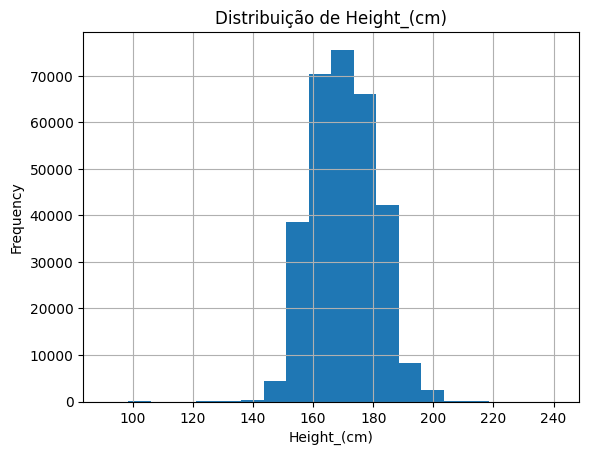

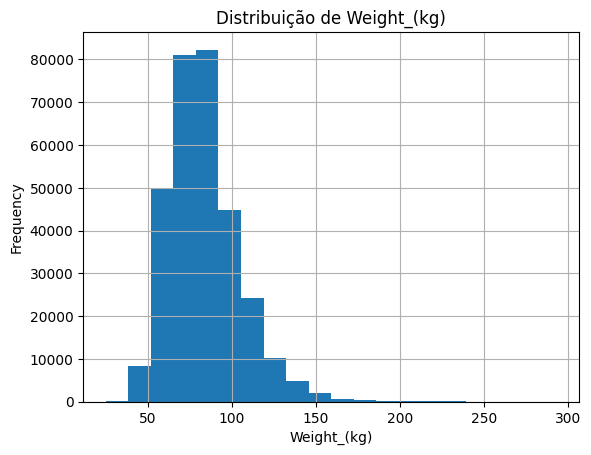

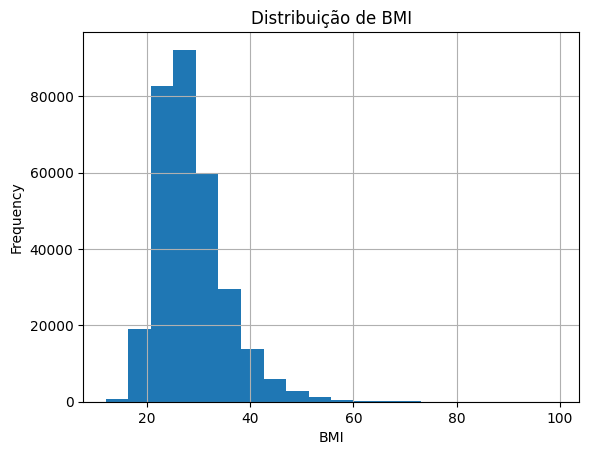

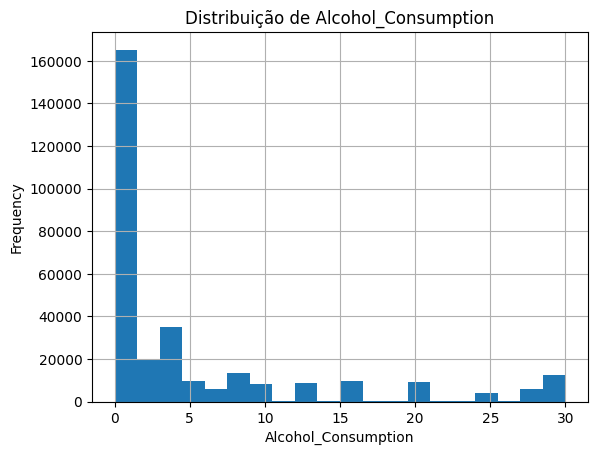

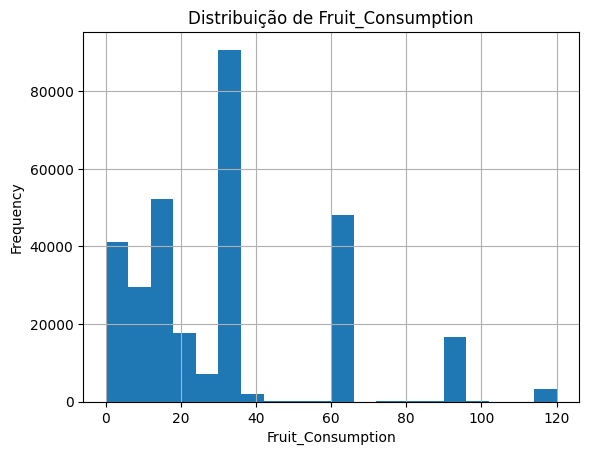

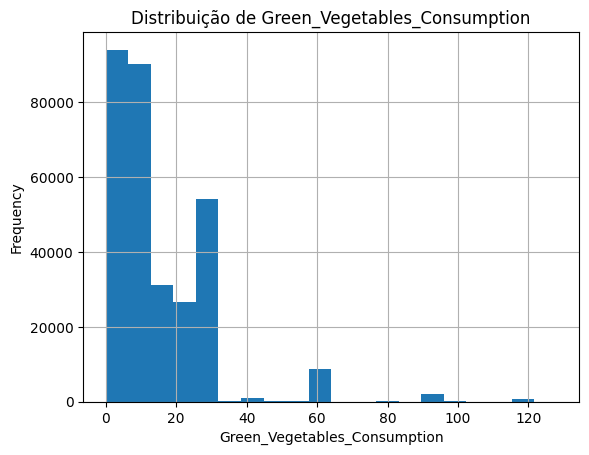

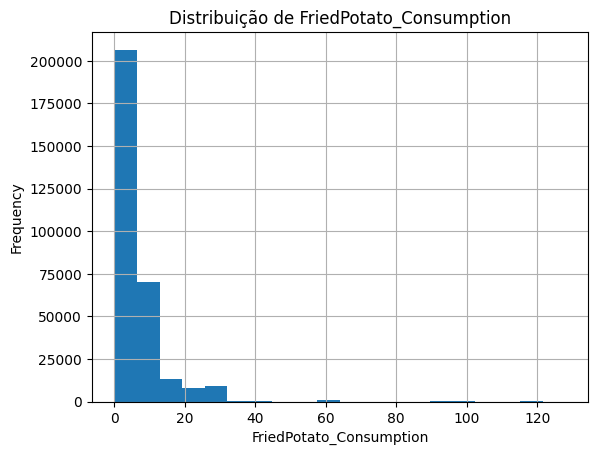

In [22]:
continuous_vars = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

for var in continuous_vars:
    cvd_df[var].hist(bins=20)
    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

## Variáveis Discretas

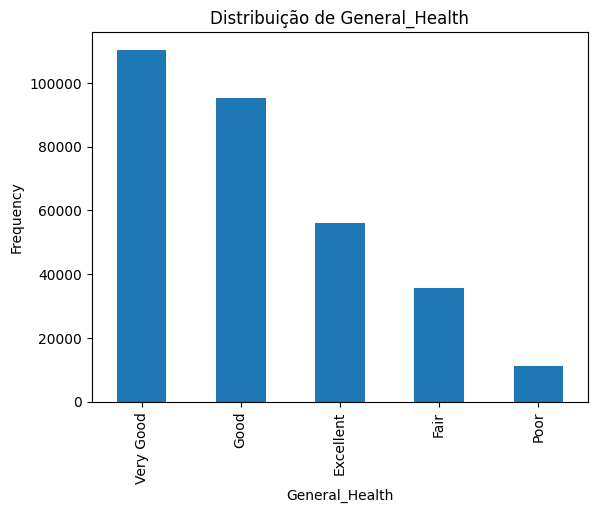

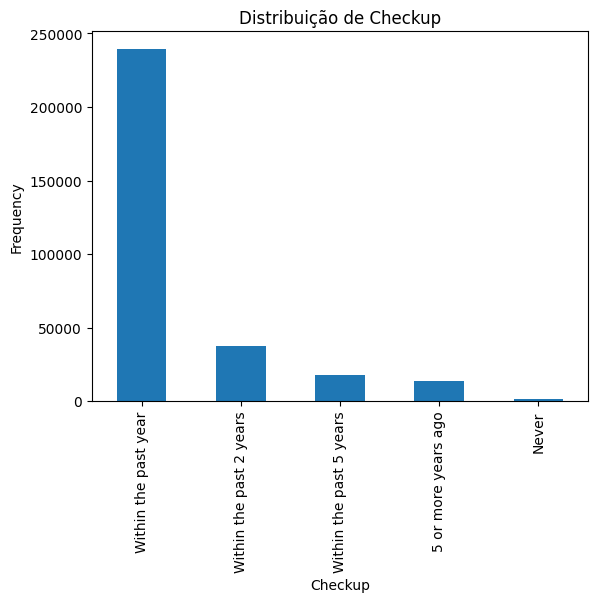

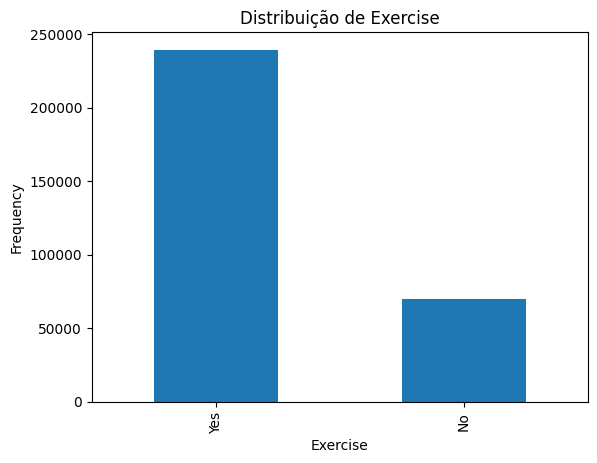

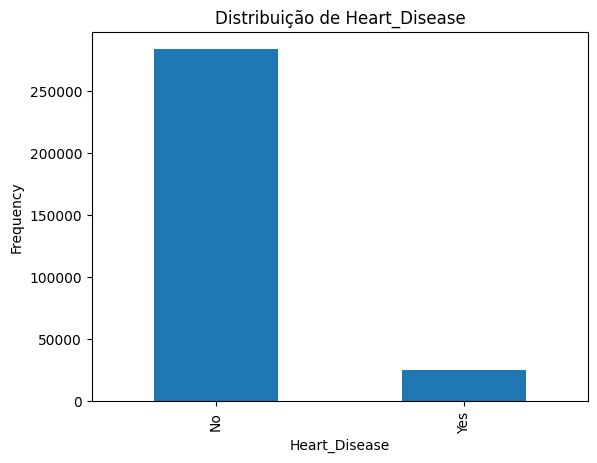

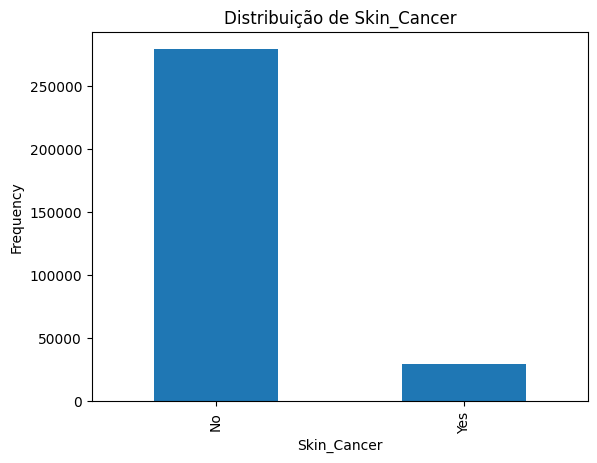

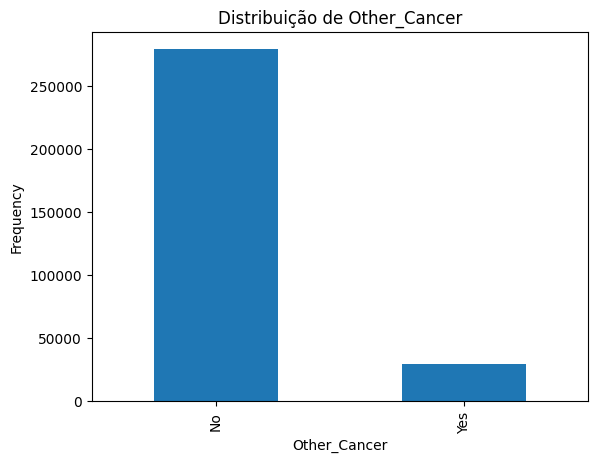

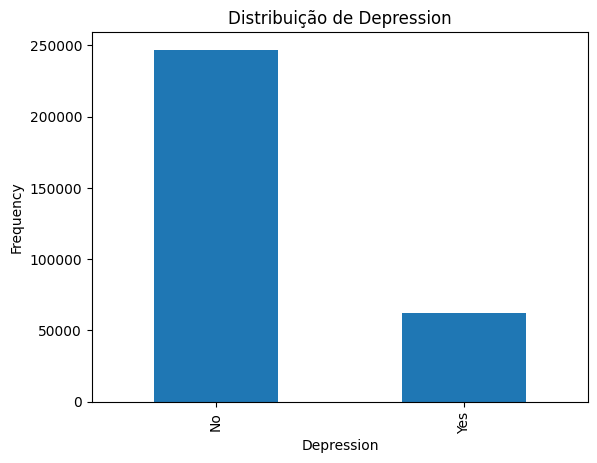

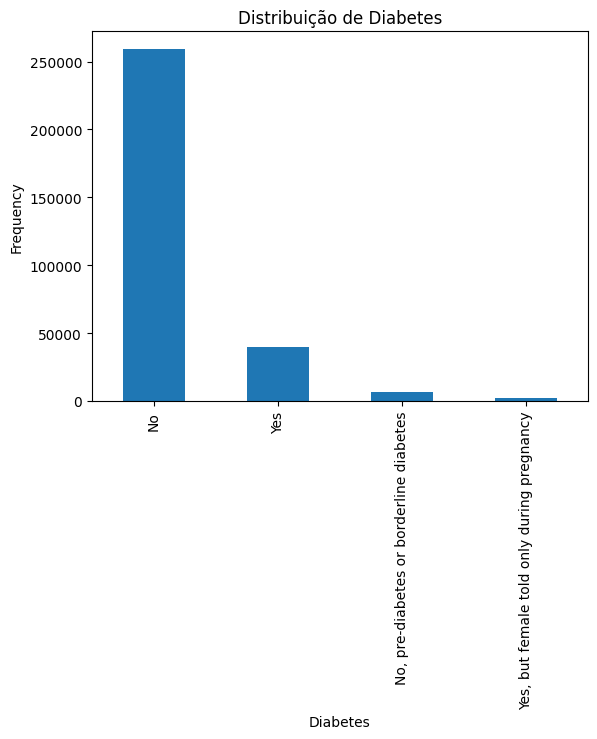

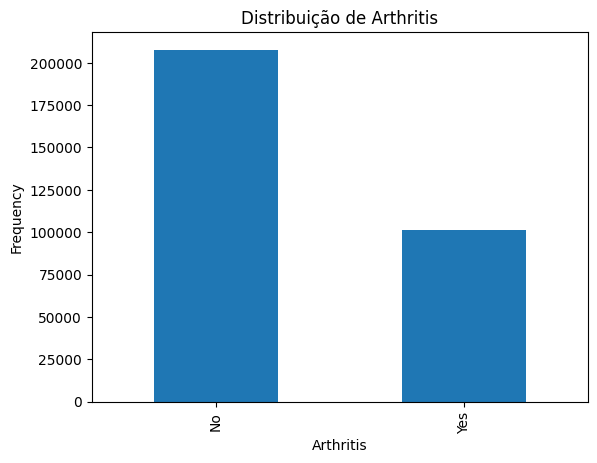

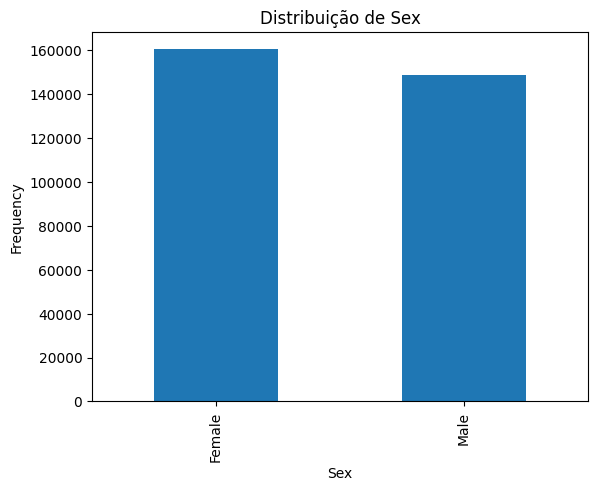

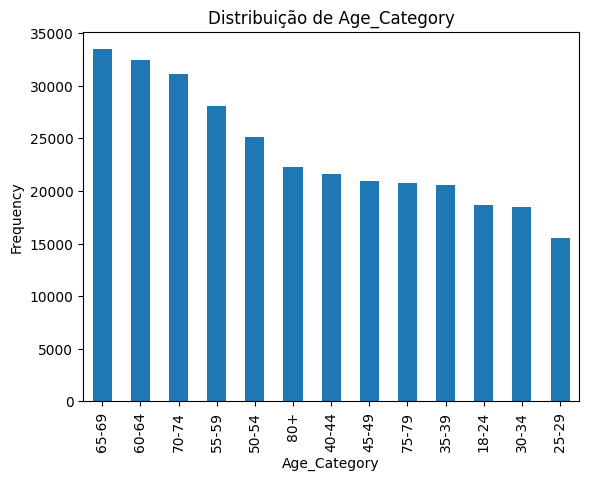

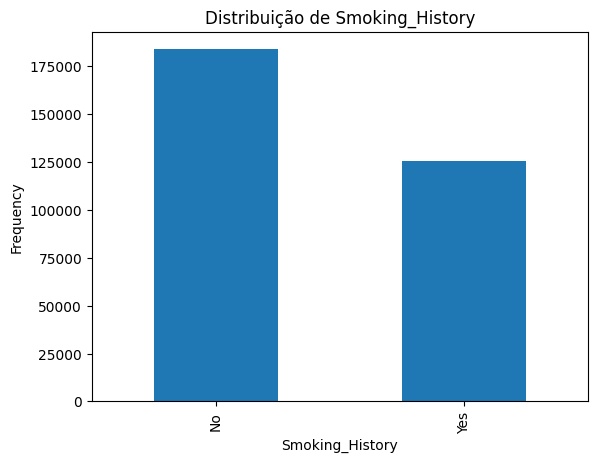

In [27]:
discrete_vars = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

for var in discrete_vars:
    cvd_df[var].value_counts().plot(kind='bar')
    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()